Yuval Shimon   
Maman 11 - Question 1

In [2]:
# imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
image = cv2.imread("picture_1.jpg")  # load image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # convert to grayscale

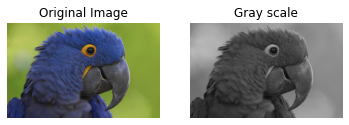

In [4]:
# 1 a - load a picture and show it in color and in grayscale
grayscale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # convert to grayscale

plt.subplot(121)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")  # remove axis

plt.subplot(122)
plt.title("Gray scale")
plt.imshow(grayscale, cmap="gray")
plt.axis("off")  # remove axis

plt.show()

(1200, 1920)


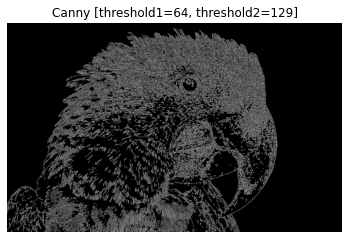

(1200, 1920)


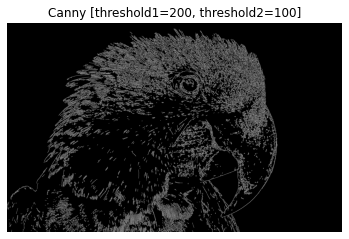

(1200, 1920)


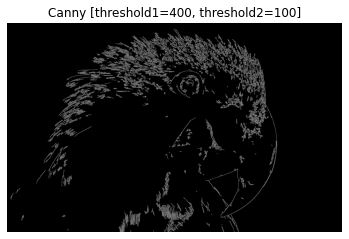

In [20]:
# 1 b Canny Edge detector
# example 1 - using the calculated median of intensities
# example 2 - high initial threshold, lower second threshold
# example 3 - even highter initial threshold, low second threshold
median = np.median(grayscale)
sigma = 0.33
upper = int(max(0, (1.0 - sigma) * median))
lower = int(min(255, (1.0 + sigma) * median))

thresholds = (upper, lower), (200, 100), (400, 100)

for i, threshold in enumerate(thresholds):
    threshold1, threshold2 = threshold
    plt.axis("off")
    plt.imshow(
        cv2.Canny(grayscale, threshold1=threshold1, threshold2=threshold2), cmap="gray"
    )
    plt.title(f"Canny [threshold1={threshold1}, threshold2={threshold2}]")
    plt.show()

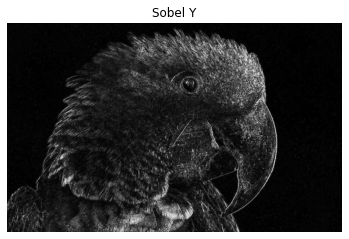

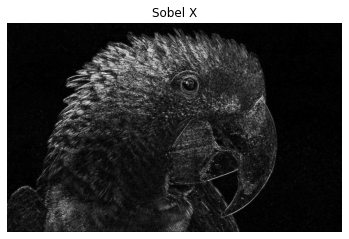

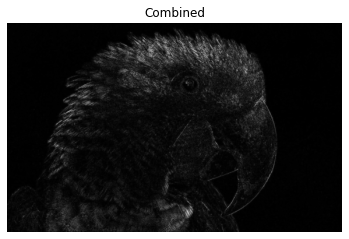

In [6]:
# 1 b - sobel operator
img_sobelx = cv2.Sobel(grayscale, cv2.CV_64F, 1, 0, ksize=3)  # Sobel on X
img_sobely = cv2.Sobel(grayscale, cv2.CV_64F, 0, 1, ksize=3)  # Sobel on Y
combined = cv2.Sobel(grayscale, cv2.CV_64F, 1, 1, ksize=3)  # Combined Sobel

# convert back to grascale
img_sobelx = cv2.convertScaleAbs(img_sobelx)
img_sobely = cv2.convertScaleAbs(img_sobely)
combined = cv2.convertScaleAbs(combined)

plt.title("Sobel Y")
plt.imshow(img_sobelx, cmap="gray")
plt.axis("off")  # remove axis
plt.show()

plt.title("Sobel X")
plt.imshow(img_sobely, cmap="gray")
plt.axis("off")
plt.show()

plt.title("Combined")
plt.imshow(combined, cmap="gray")
plt.axis("off")
plt.show()

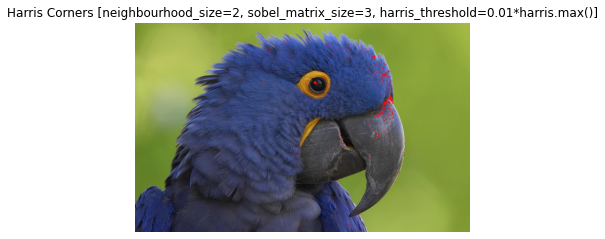

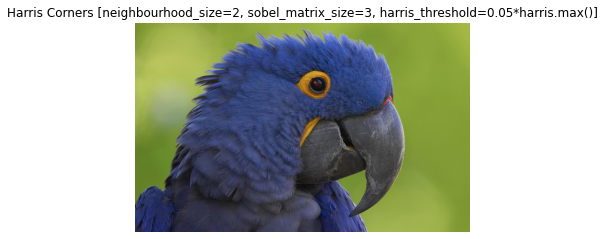

In [7]:
# 1 c Running Harris Corners
# Set 1
neighbourhood_size = 2
sobel_matrix_size = 3
harris_threshold_1 = 0.01
harris_threshold_2 = 0.05


def __plot_harris(neighbourhood_size, sobel_matrix_size, harris_threshold):
    image_ = np.copy(image)  # copy original image
    grayscale_ = np.float32(
        grayscale
    )  # input image should be grayscale and float32 format
    harris = cv2.cornerHarris(
        grayscale_, 2, 3, 0.04
    )  # apply harris corner detector to gray image
    # result is dilated for marking the corners, not important
    harris = cv2.dilate(harris, None)

    # filter points by optimal values
    points = np.where(harris > harris_threshold * harris.max())

    # mark points with red color
    image_[points] = [255, 0, 0]

    # plot
    plt.imshow(image_)
    plt.title(
        f"Harris Corners [neighbourhood_size={neighbourhood_size}, sobel_matrix_size={sobel_matrix_size}, harris_threshold={harris_threshold}*harris.max()]"
    )
    plt.axis("off")
    plt.show()


__plot_harris(neighbourhood_size, sobel_matrix_size, harris_threshold_1)
__plot_harris(neighbourhood_size, sobel_matrix_size, harris_threshold_2)
# Showing original image but the HarrisCorner was done on the grayscale image of source

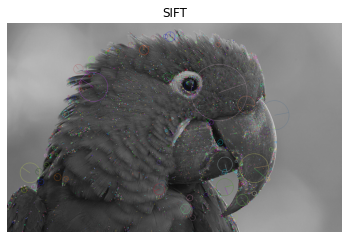

In [8]:
# 1 d - calculating SIFT
sift = cv2.SIFT_create()
kp, _ = sift.detectAndCompute(
    grayscale, None
)  # detect calculate sift in the grayscale picture
# drawing the keypoints and orientation of the keypoints in the image and then displaying the image as the output on the screen
sift = cv2.drawKeypoints(
    grayscale, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)  # draw keypoints
plt.imshow(sift)
plt.axis("off")
plt.title(f"SIFT")
plt.show()

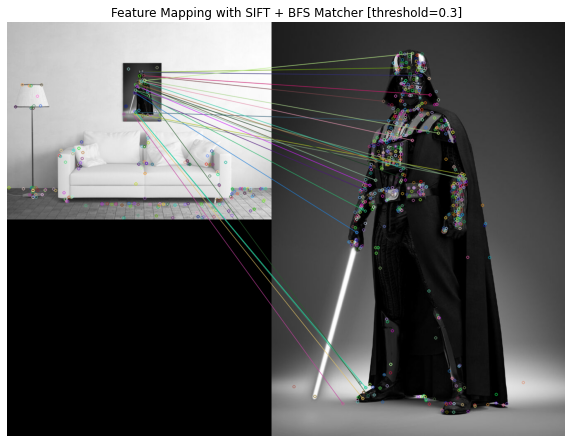

In [9]:
# 1 e - Matching
# read images
threshold = 0.3
image1 = cv2.imread("vader1.jpg")
image2 = cv2.imread("vader2.jpg")

image1_grayscale = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2_grayscale = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# find points with SIFT
sift = cv2.SIFT_create()
kp1, dst1 = sift.detectAndCompute(image1_grayscale, None)
kp2, dst2 = sift.detectAndCompute(image2_grayscale, None)

# matcher - usuing KNN matcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(dst1, dst2, k=2)


def _filter_matches(match, threshold=threshold):
    n, m = match
    return n.distance < m.distance * threshold


filtered_matches = list(filter(_filter_matches, matches))  # apply distance filter
matched_img = cv2.drawMatchesKnn(
    image1_grayscale, kp1, image2_grayscale, kp2, filtered_matches, None
)  # draw matched figures
# plot
plt.figure(figsize=(10, 10))
plt.title(f"Feature Mapping with SIFT + BFS Matcher [threshold={threshold}]")
plt.imshow(matched_img)
plt.axis("off")
plt.show()

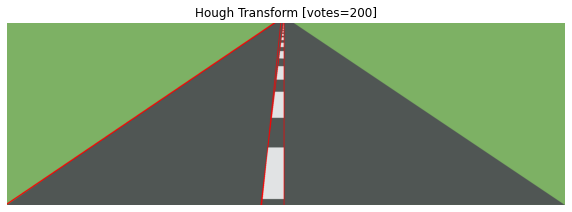

In [21]:
# 1 fH HOUGH transformation
hough_image = cv2.imread("road.png")  # read image
hough_image = cv2.cvtColor(hough_image, cv2.COLOR_BGR2RGB)
hough_grayscale = cv2.cvtColor(hough_image, cv2.COLOR_BGR2GRAY)  # convert to grayscale

edges = cv2.Canny(
    hough_grayscale, 50, 150, apertureSize=3
)  # input image should be a binary image, so apply threshold or use canny edge detection before finding applying hough transform
rho = 1
theta = np.pi / 180
votes = 200
lines = np.asarray(
    cv2.HoughLines(edges, rho, theta, threshold=votes)
)  # at least 200 votes to be considred as a line

for rho, theta in lines[:, 0]:  # transform the chosen line to cartesian coordinate
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(
        hough_image, (x1, y1), (x2, y2), (255, 0, 0), 2
    )  # plot the line on the original image (hough was made on the grayscale image)

# plot image
plt.figure(figsize=(10, 10))
plt.imshow(hough_image)
plt.axis("off")
plt.title(f"Hough Transform [votes={votes}]")
plt.show()